In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def rosenbrock(x,y):  ### it has a global minimum of 0 at the point (1, 1)
    return (1 + x)**2 + 100*(y - x**2)**2

def grad_rosenbrock(x,y):
    gx = -400*x*y + 400*x**3 + 2*x -2
    gy = 200*y -200*x**2
    return np.array([g1,g2])

In [ ]:
def gradient_descent(grad_fn, x, y, typ, gamma=0.0013, tolr=0.00001, max_itrs=100000):
    
    i = 0
    itr_x, itr_y, itr_count = [], [], []
    X = np.array([x,y])

    if typ == 'vanilla':
        error = 10
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x.append(x)
            itr_y.append(y)
            itr_count.append(i)         
            X_prev = X
            X = X - gamma * grad_fn(x,y)
            error = X - X_prev
            x,y = X

    
    if typ == 'momentum':
        error = 10
        V = 0
        beta = 0.9
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x.append(x)
            itr_y.append(y)
            itr_count.append(i)    
            X_prev = X            
            V = beta*V + (1-beta)*grad_fn(x,y)
            X = X - gamma * V
            error = X - X_prev
            x,y = X[0], X[1]

    
    if typ == 'nestrov':
        i = 0
        error = 0.001
        tolr= 1e-8
        V = 0
        beta = 0.01
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x.append(x)
            itr_y.append(y)
            itr_count.append(i) 
            X_prev = X            
            V = beta*V - gamma*grad_fn(x,y)
            X = X + V
            error = X - X_prev
            x,y = X[0], X[1]


    if typ == 'adam':
        error = 0.001
        tolr = 1e-8
        alp = 0.001
        bta_1 = 0.9
        bta_2 = 0.999
        V = 0
        S = 0
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x = np.append(itr_x,x)
            itr_y = np.append(itr_y,y)
            itr_count = np.append(itr_count ,i)
            X_prev = X            
            S = bta_2*S + (1-bta_2)*(grad_fn(x,y)**2)
            V = bta_1*V + (1-bta_1)*grad_fn(x,y)
            
            V_cap = V /(1-bta_1)
            S_cap = S/(1-bta_2)
            
            X = X- alp*V_cap/(np.sqrt(S_cap)+tolr)
            error = X - X_prev
            x,y = X[0], X[1]

    print(X)
    return X, np.array(itr_x), np.array(itr_y), itr_count
    

In [ ]:
def plot_results(itr_x, itr_y, itr_count):

    x = np.linspace(-4,4,250)
    y = np.linspace(-4,4,250)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    anglesx = itr_x[1:] - itr_x[:-1]
    anglesy = itr_y[1:] - itr_y[:-1]
    fig = plt.figure(figsize = (40,15))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(itr_x,itr_y, rosenbrock(itr_x,itr_y),color='r', marker='*', alpha=.4)
    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    ax.scatter(itr_x,itr_y,color = 'r', marker = '*')
    ax.quiver(itr_x[:-1], itr_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Gradient Descent with {} iterations'.format(len(itr_count)))
    ax.set_visible(True)

    plt.show()

## Vanilla gradient descend  
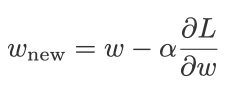

[0.99146366 0.98296585]


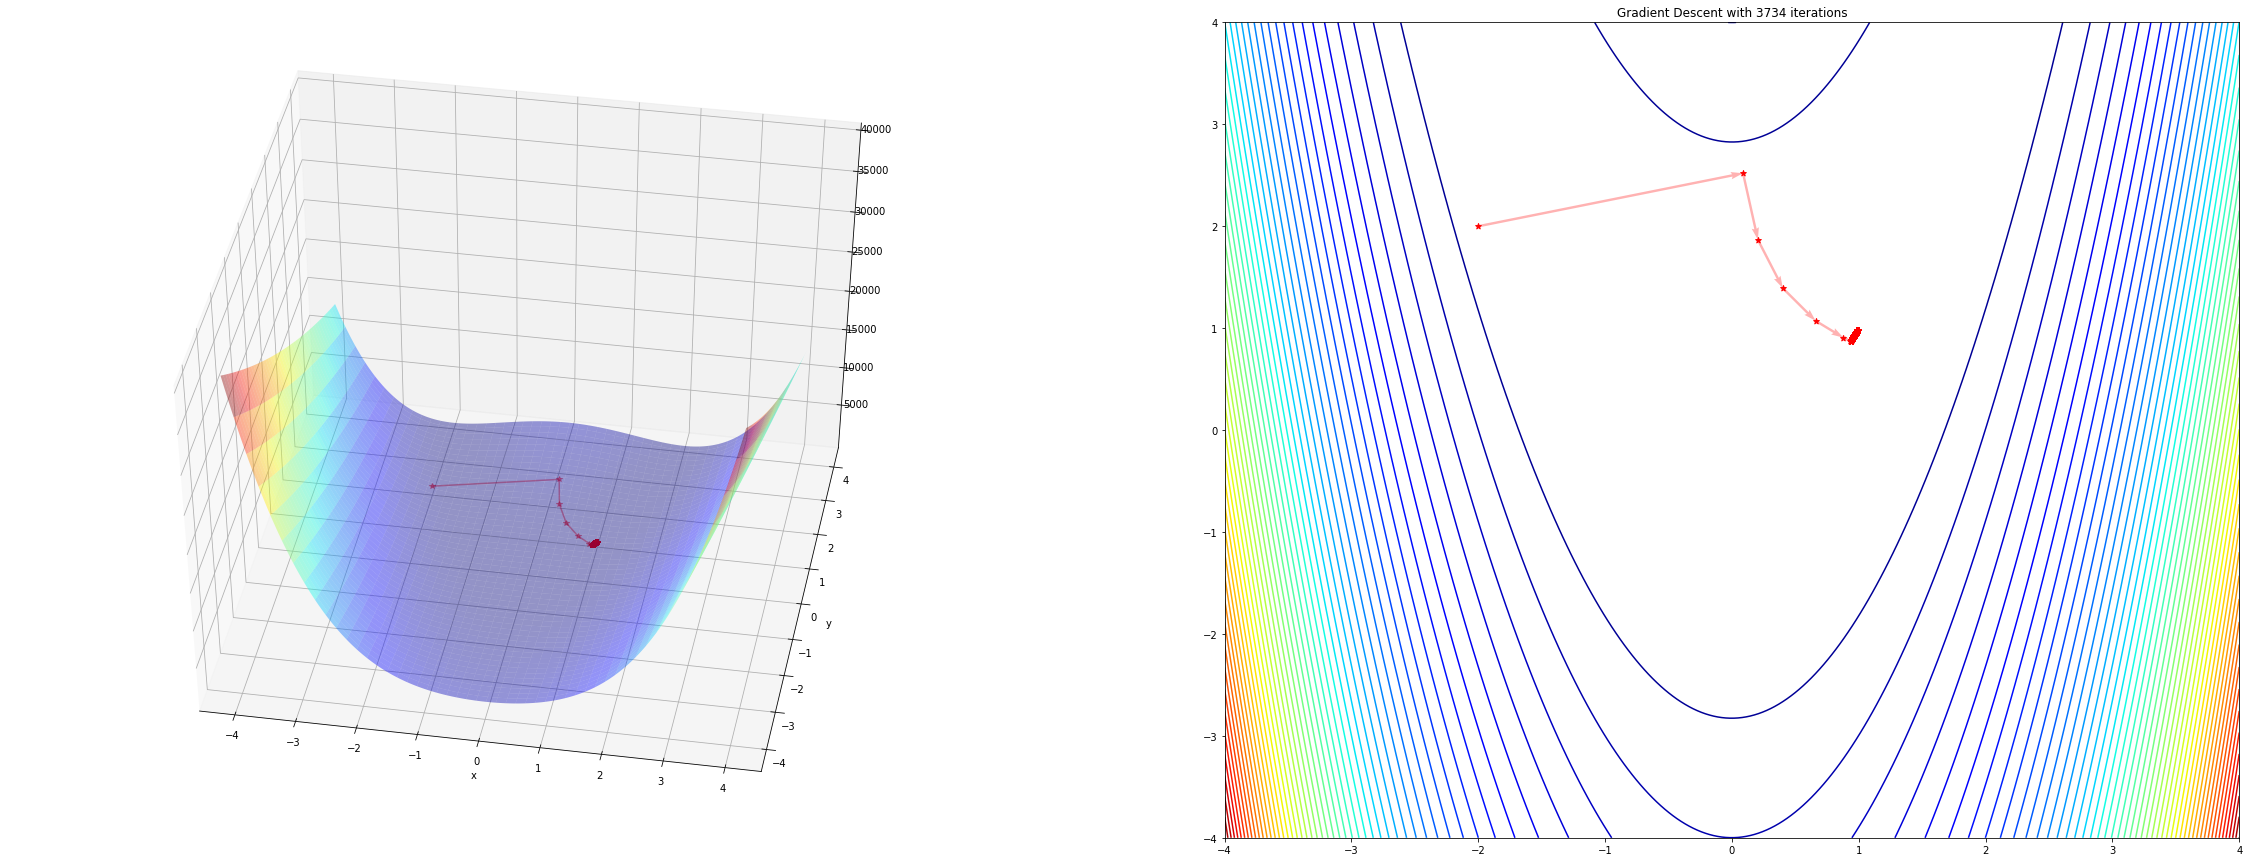

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_rosenbrock,-2,2,typ='vanilla')
plot_results(iter_x, iter_y, iter_count)

## Polyak's momentum based gradient descent  
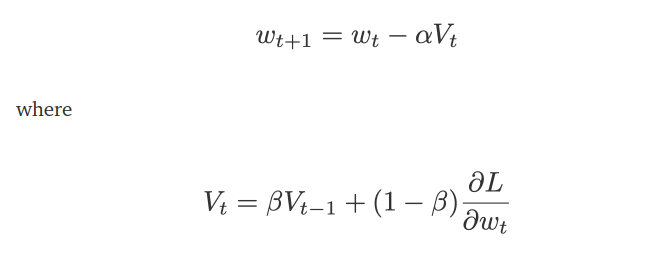

[0.99150579 0.98304957]


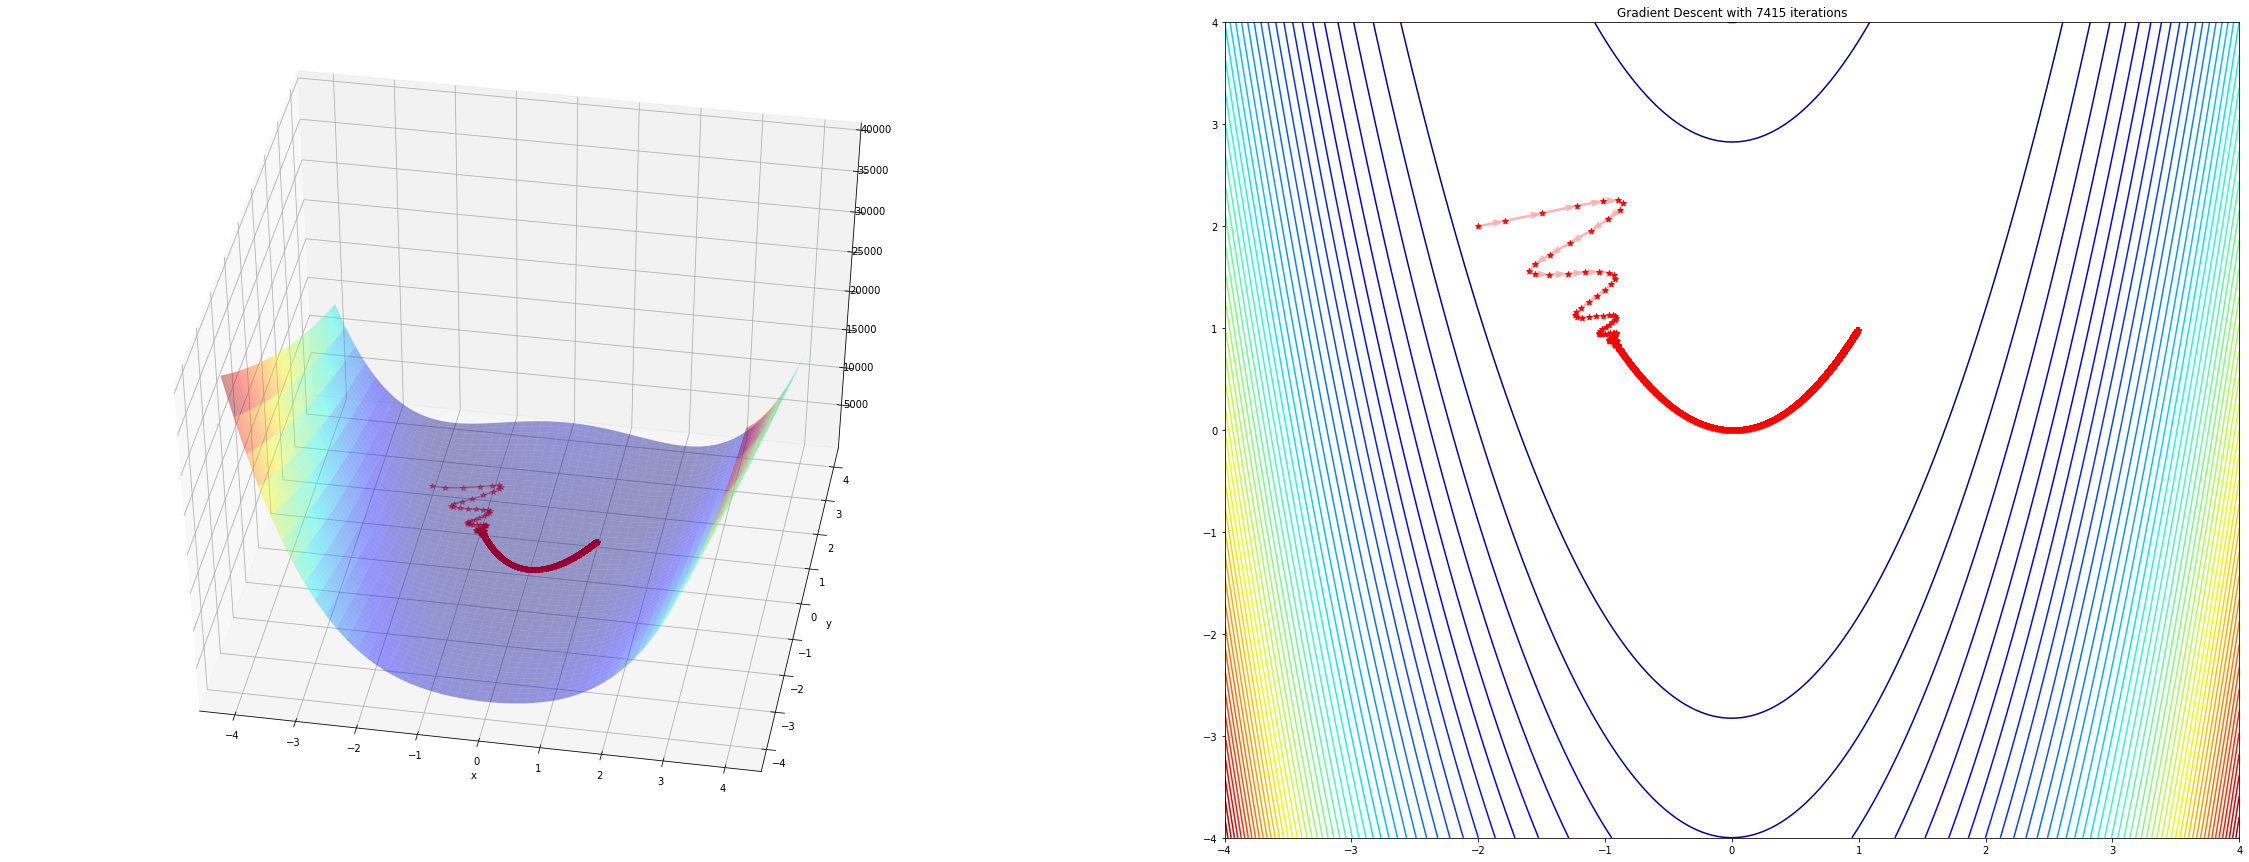

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_rosenbrock,-2,2,typ='momentum')
plot_results(iter_x, iter_y, iter_count)

## Nesterov accelerated gradient descent  
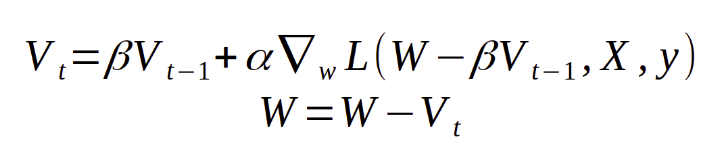


[0.99999149 0.99998295]


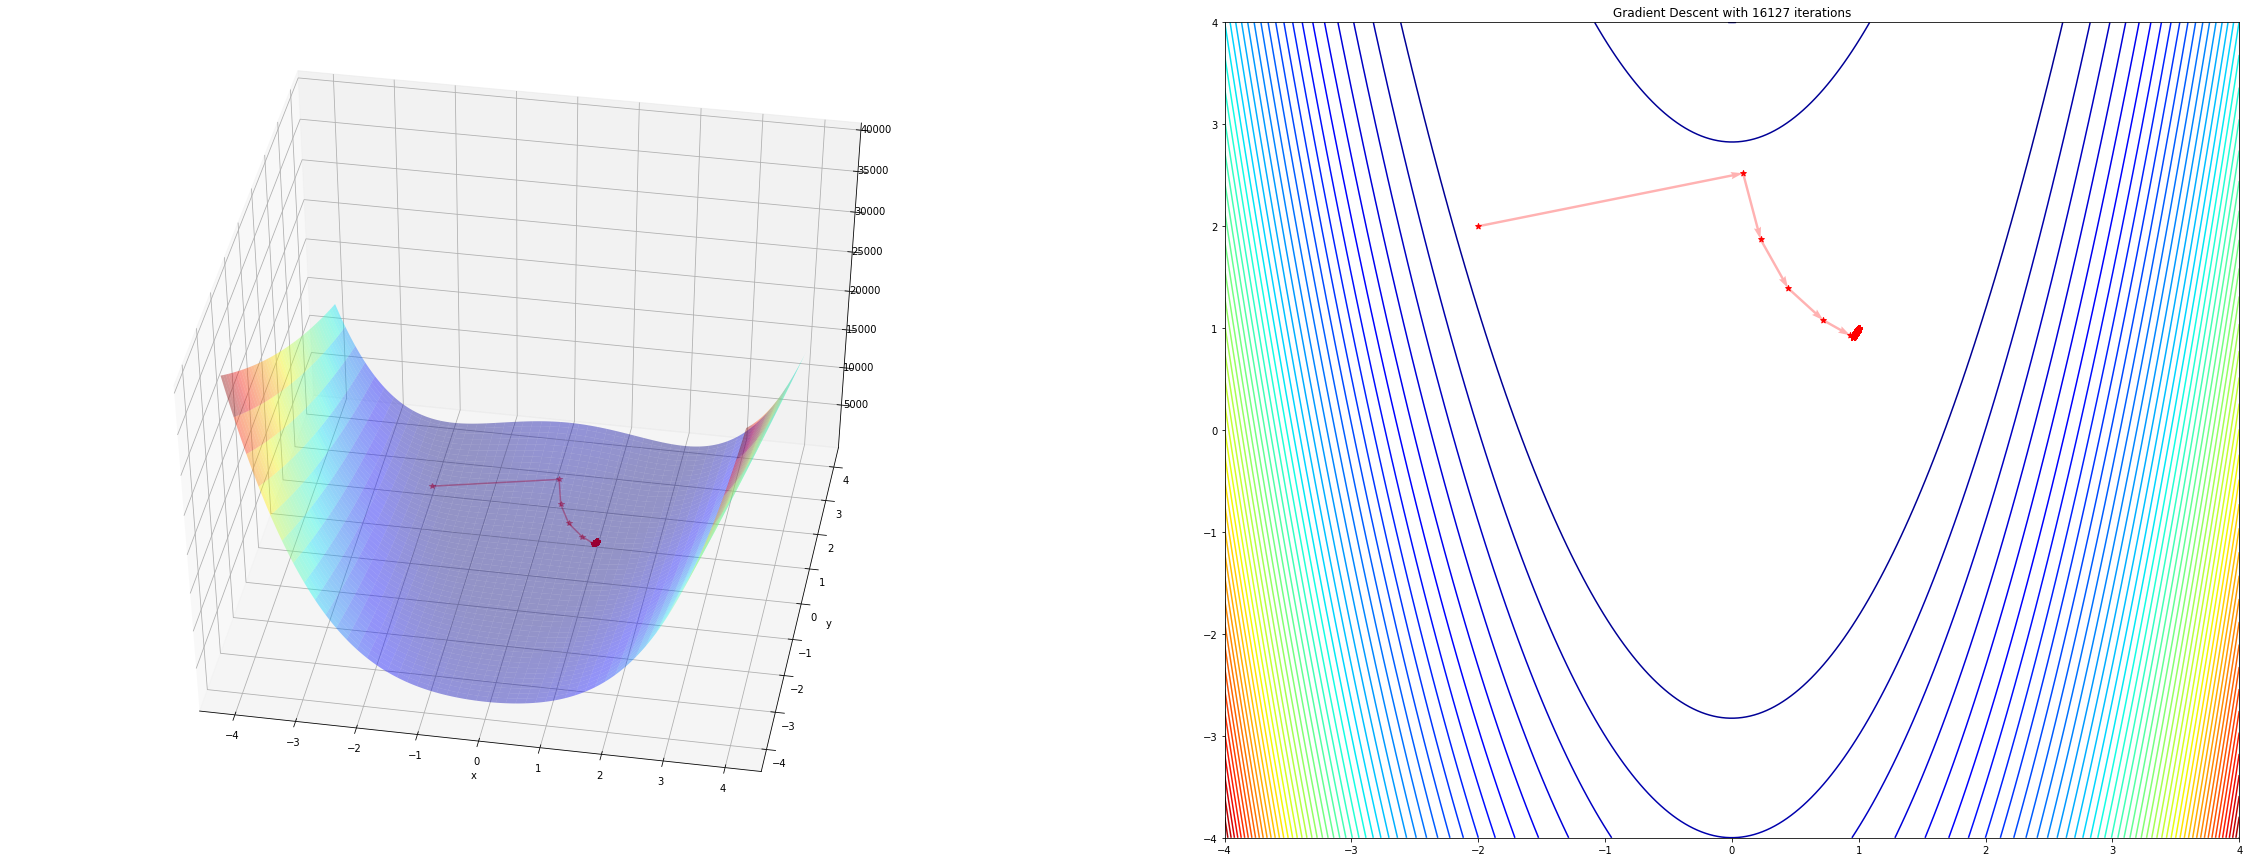

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_rosenbrock,-2,2,typ='nestrov')
plot_results(iter_x, iter_y, iter_count)

## Adam optimizer  
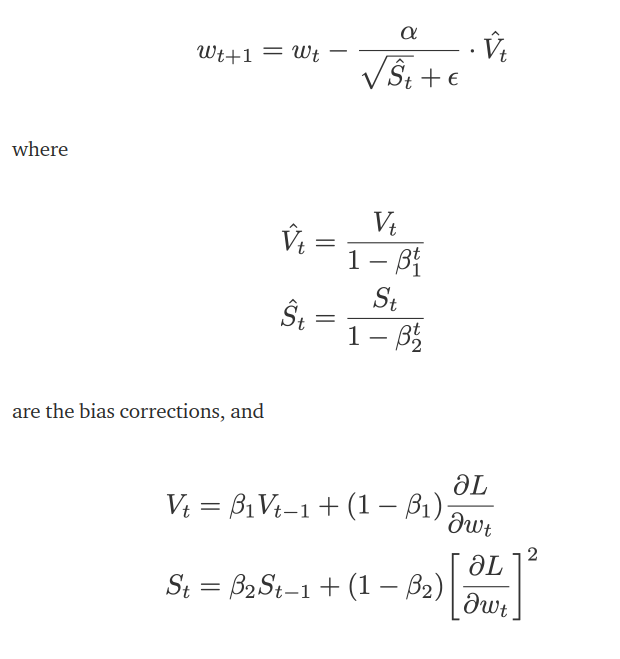

[0.99999933 0.99999866]


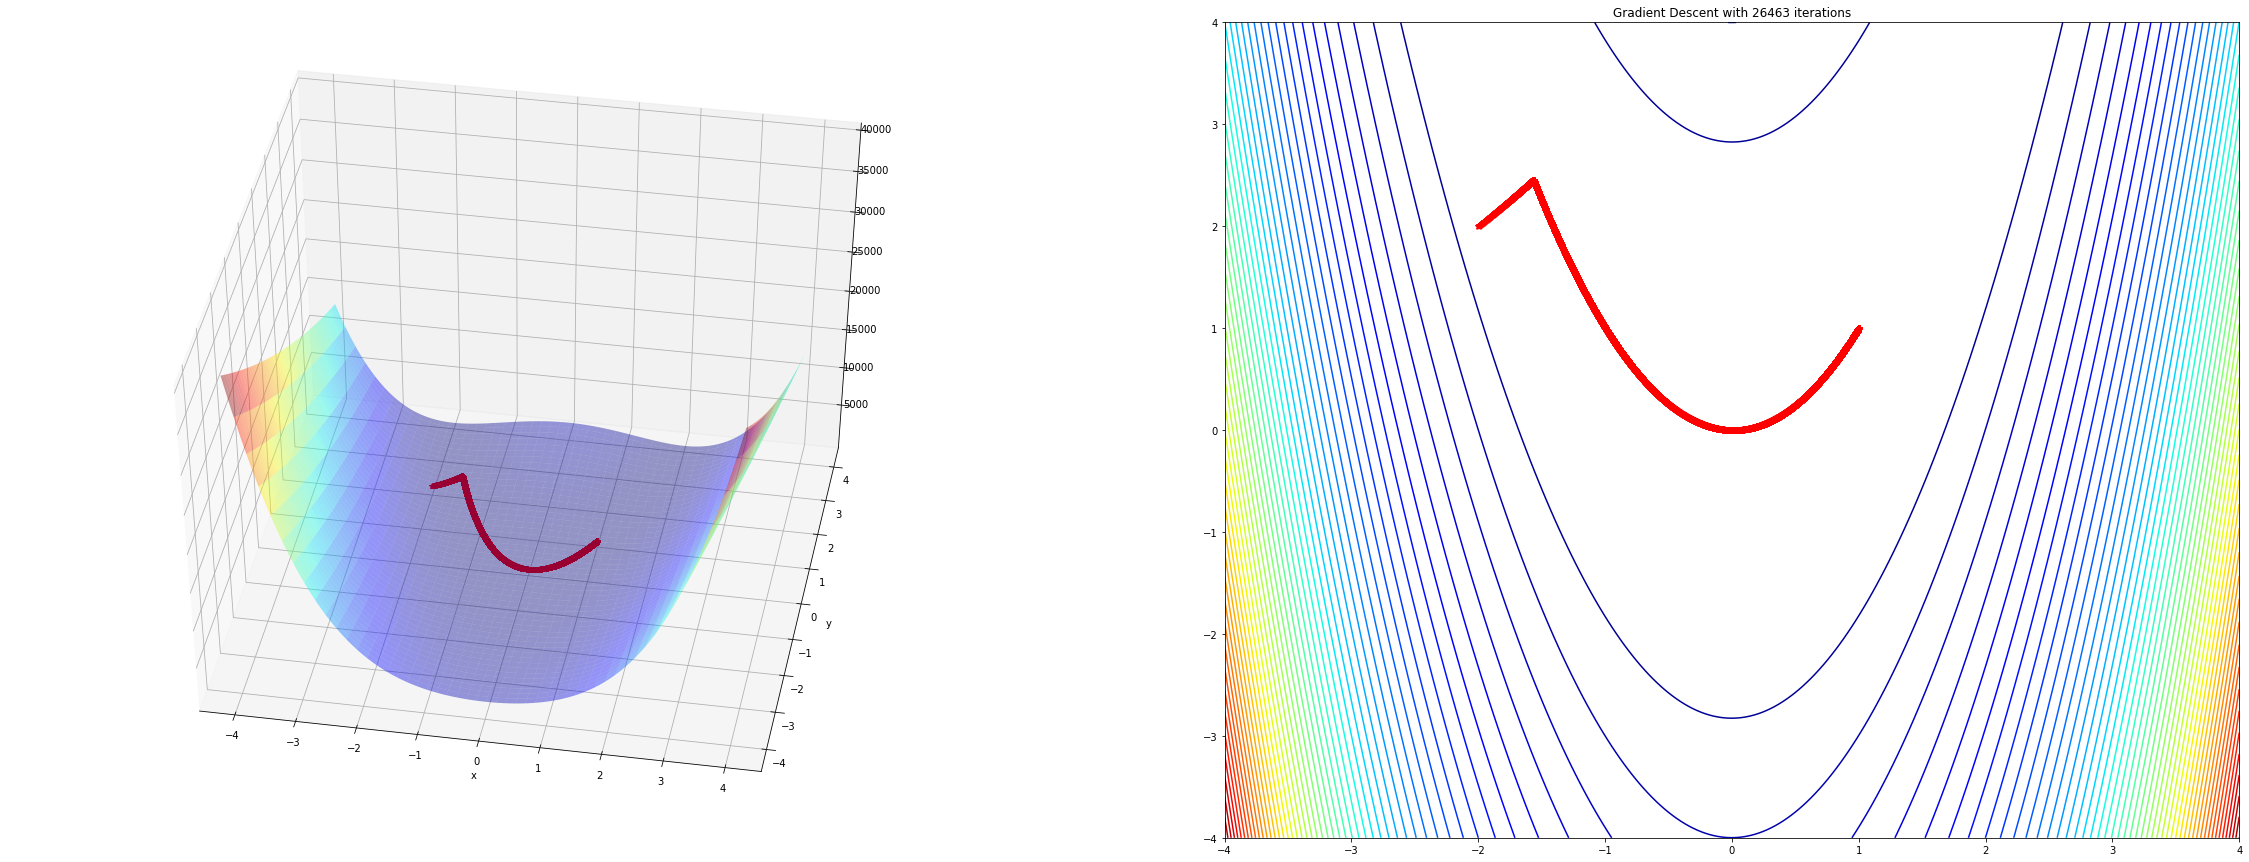

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_rosenbrock,-2,2,typ='adam')
plot_results(iter_x, iter_y, iter_count)